In [6]:
import matplotlib.pyplot as plt
from odmactor.scheduler import CWScheduler
import scipy.constants as C
import numpy as np
from odmactor.utils.plotting import plot_freq_contrast
import time


设置参数：

In [7]:
t_ns = 1e5
N = int(1e5 / 4)


freq_start = 2.85 * C.giga
freq_end = 2.9 * C.giga
freq_step = 1 * C.mega
p = 15


执行测量：


In [8]:
# 通道、微波、序列、counter
scheduler = CWScheduler()
scheduler.configure_mw_paras(p)
scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_odmr_seq(t_ns, N)
scheduler.configure_tagger_counting()

scheduler.run_scanning('on')
# res_on = scheduler.result  # [freqs, counts]
#
# scheduler.run_scanning('off')
# res_off = scheduler.result
scheduler.close()
# contrasts = [abs(c_off - c_on) / c_on for c_on, c_off in zip(res_on[1], res_off[1])]

--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}
Begin to run CW ODMR Scheduler. Frequency: 2.850 - 2.900 GHz.
t: 100000.00 ns, N: 25000, T: 2.50 s, n_freqs: 51
Estimated total running time: 127.50 s
MW on/off status: True
CW _acquire_data_with_ref
scanning freq 2.8500 GHz
scanning freq 2.8510 GHz
scanning freq 2.8520 GHz
scanning freq 2.8530 GHz
scanning freq 2.8540 GHz
scanning freq 2.8550 GHz
scanning freq 2.8560 GHz
scanning freq 2.8570 GHz
scanning freq 2.8580 GHz
scanning freq 2.8590 GHz
scanning freq 2.8600 GHz
scanning freq 2.8610 GHz
scanning freq 2.8620 GHz
scanning freq 2.8630 GHz
scanning freq 2.8640 GHz
scanning freq 2.8650 GHz
scanning freq 2.8660 GHz
scanning freq 2.8670 GHz
scanning freq 2.8680 GHz
scanning freq 2.8690 GHz
scanning freq 2.8700 GHz
scanning freq 2.8710 GHz
scanning freq 2.8720 GHz
scanning freq 2.8730 GHz
scanning freq 2.8740 GHz
scanning freq 2.8750 GHz
scanning freq 2.8760 GHz
scanning freq 2.8770 GHz
scanning freq 2.8780 

In [9]:
res_on_off = scheduler.result
res = scheduler.res

plt.style.use('seaborn')


画计数图（MW on v.s. MW off)


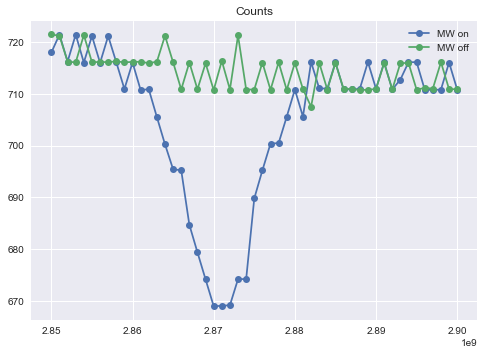

In [10]:
plt.plot(res_on_off[0], res_on_off[1],'o-',label='MW on')
plt.plot(res_on_off[0], res_on_off[2], 'o-', label='MW off')
plt.legend()
plt.title('Counts')
plt.show()



画对比度图 $ S / R$

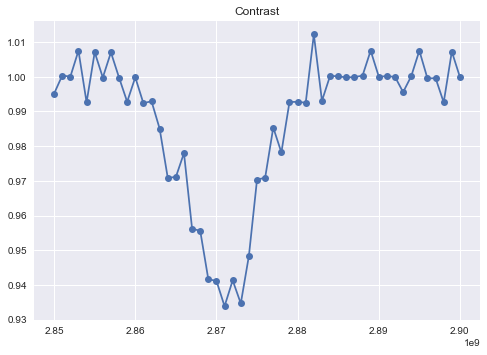

In [11]:
plt.plot(res_on_off[0], res, 'o-')
plt.title('Contrast')
plt.show()

保存数据：

In [18]:
np.savetxt('cw-counting--10dbm.txt', np.array(res_on_off))
np.savetxt('cw-contrast--10dbm.txt',np.vstack([res_on_off[0], res]).T)


---







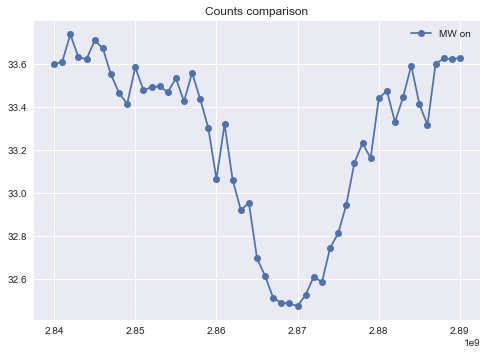

In [23]:
plt.figure()
plt.plot(*res_on, 'o-',  label='MW on')
# plt.plot(*res_off, label='MW off')
plt.legend()
plt.title('Counts comparison')
# plt.savefig('counts_on_off (CW)', dpi=400)
plt.show()


In [ ]:
plot_freq_contrast(res_on[0], contrasts, fname='contrasts-CW')
plt.show()




In [ ]:
print('Average counting:')
print('MW on:')
print(np.round(res_on, 2))
print('MW off:')
print(np.round(res_off, 2))
print('Contrast:')
print(np.round(contrasts))
#

np.savetxt('counts-cw-new.txt', res_on + res_off)
np.savetxt('contrast-cw-new.txt', np.vstack([scheduler._freqs, contrasts]))